In [33]:
import numpy as np
from matplotlib import pyplot as plt
from brendapyrser import BRENDA


dataFile = 'brenda_2023_1.txt'

In [34]:
# Let's load the database
brenda = BRENDA(dataFile)
brenda

Number of Enzymes,7832
BRENDA copyright,"Copyrighted by Dietmar Schomburg, Techn. University Braunschweig, GERMANY. Distributed under the License as stated at http:/www.brenda-enzymes.org"
Parser version,0.0.1
Author,"Semidán Robaina Estévez, 2020"


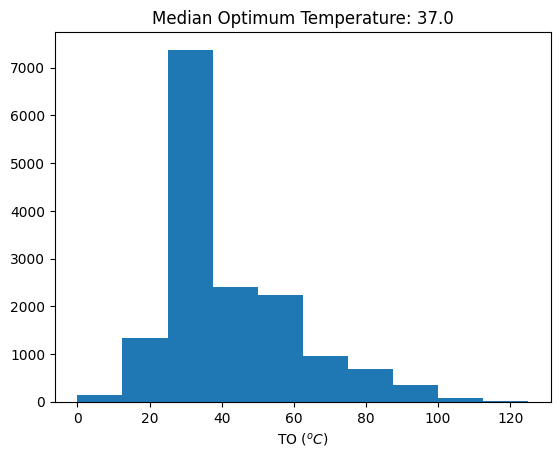

Minimum and maximum values in database: 0.0 °C, 125.0 °C


In [35]:
# Plot all enzyme optimal temperature values in the database
BRENDA_TO = np.array([v for r in brenda.reactions 
                       for v in r.temperature.filter_by_condition(
                           'optimum').get_values()])
values = BRENDA_TO[(BRENDA_TO >= 0)]
plt.hist(values)
plt.title(f'Median Optimum Temperature: {np.median(values)}')
plt.xlabel('TO (${}^oC$)')
plt.show()
print(f'Minimum and maximum values in database: {values.min()} °C, {values.max()} °C')

In [36]:
BRENDA_KMs = np.array([v for r in brenda.reactions 
                       for v in r.KMvalues.get_values()])
values1 = BRENDA_KMs[(BRENDA_KMs < 1000) & (BRENDA_KMs >= 0)]

BRENDA_Kcats = np.array([v for r in brenda.reactions 
                       for v in r.Kcatvalues.get_values()])
values2 = BRENDA_Kcats[(BRENDA_Kcats < 1000) & (BRENDA_Kcats >= 0)]

BRENDA_TO = np.array([v for r in brenda.reactions 
                       for v in r.temperature.filter_by_condition(
                           'optimum').get_values()])
values3 = BRENDA_TO[(BRENDA_TO >= 0)]

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.DataFrame()

In [38]:
df['Median Km'] = pd.Series(values1.tolist())
df['Median Kcat'] = pd.Series(values2.tolist())
df['Median Optimum Temp'] = pd.Series(values3.tolist())
print(df)

        Median Km  Median Kcat  Median Optimum Temp
0         0.05000        0.833                 83.0
1         1.40000       48.800                 80.0
2         0.12000        3.100                 47.5
3         3.80000       15.100                 27.5
4        34.00000        0.004                 40.0
...           ...          ...                  ...
176273    0.06080          NaN                  NaN
176274    0.08340          NaN                  NaN
176275    0.09190          NaN                  NaN
176276    0.00832          NaN                  NaN
176277    0.00941          NaN                  NaN

[176278 rows x 3 columns]


In [39]:
df.dropna(inplace = True)
print(df)

       Median Km  Median Kcat  Median Optimum Temp
0           0.05        0.833                 83.0
1           1.40       48.800                 80.0
2           0.12        3.100                 47.5
3           3.80       15.100                 27.5
4          34.00        0.004                 40.0
...          ...          ...                  ...
15546       1.50      136.300                 22.0
15547      48.00        0.270                 37.0
15548      54.00       27.300                 30.0
15549     110.00       21.200                 20.0
15550       0.05        0.100                 22.0

[15551 rows x 3 columns]


In [40]:
output_path = 'output.csv'
df.to_csv(output_path, index = False)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15551 entries, 0 to 15550
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Median Km            15551 non-null  float64
 1   Median Kcat          15551 non-null  float64
 2   Median Optimum Temp  15551 non-null  float64
dtypes: float64(3)
memory usage: 486.0 KB
